In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential




Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [23]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True, # 수평 대칭 이미지를 50% 확률
                                  width_shift_range=0.1, # 전체 크기의 10% 범위에서 좌우로
                                  height_shift_range=0.1, # 마찬가지로 위, 아래 이동
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./train', # 학습셋이 있는 폴더 위치
                                                target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode='binary')

# 테스트 셋은 이미지 부풀리기 과정을 진행하지 않는다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./test', # 테스트 셋이 있는 폴더 위치
                                                 target_size=(150, 150),
                                                 batch_size=5,
                                                 class_mode='binary')


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [21]:
transfer_model = VGG16(weights='imagenet', include_top=False, ## VGG16
                      input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()
finetune_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizers.Adam(learning_rate=0.0002),
                      metrics=['accuracy'])

history = finetune_model.fit_generator(train_generator,
                                      steps_per_epoch=30,
                                      epochs=50,
                                      validation_data=test_generator,
                                      validation_steps=len(test_generator)//5)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

30/30 [==============================] - 8s 254ms/step - loss: 0.0545 - accuracy: 0.9800 - val_loss: 0.1367 - val_accuracy: 0.9500
Epoch 33/50
30/30 [==============================] - 8s 264ms/step - loss: 0.0866 - accuracy: 0.9600 - val_loss: 0.3283 - val_accuracy: 0.8500
Epoch 34/50
30/30 [==============================] - 7s 243ms/step - loss: 0.0586 - accuracy: 0.9667 - val_loss: 0.1423 - val_accuracy: 0.9000
Epoch 35/50
30/30 [==============================] - 7s 243ms/step - loss: 0.0324 - accuracy: 0.9933 - val_loss: 0.3045 - val_accuracy: 0.9000
Epoch 36/50
30/30 [==============================] - 9s 293ms/step - loss: 0.0514 - accuracy: 0.9733 - val_loss: 0.1376 - val_accuracy: 0.9500
Epoch 37/50
30/30 [==============================] - 7s 246ms/step - loss: 0.0345 - accuracy: 0.9933 - val_loss: 0.0918 - val_accuracy: 0.9500
Epoch 38/50
30/30 [==============================] - 7s 247ms/step - loss: 0.0424 - accuracy: 0.9933 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 39/50

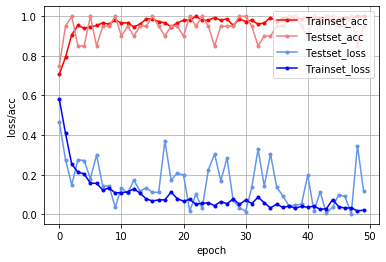

In [24]:
# 결과를 그래프로 표현하는 부분

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label='Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()